## Project: E-Commerce Sales Data Analysis

**Goal**:  
The primary objective of this project is to analyze the stock levels, product categories, sizes, colors, and design variability within the dataset. The insights gathered from this analysis will help optimize inventory management, avoid stock shortages, and ensure that the most popular products remain available to meet customer demand.

### Key Questions:

1. **Stock Management**:
    - Which products are at risk of going out of stock soon, and which categories need restocking?

2. **Category Insights**:
    - Which product categories are the most popular in terms of stock and availability?

3. **Size Availability**:
    - Are there certain product sizes that are understocked or oversupplied?

4. **Color Preferences**:
    - What are the most common colors in stock, and is there a color shortage?

5. **Design Variability**:
    - Are there any patterns in `Design No.` that correlate with stock levels?


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
import pandas as pd

# Load the dataset from the correct path
data = pd.read_csv('data/datas/Sale Report.csv')




In [36]:
data.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [37]:
data.columns

Index(['index', 'SKU Code', 'Design No.', 'Stock', 'Category', 'Size',
       'Color'],
      dtype='object')

In [38]:
data.isnull().sum()

index          0
SKU Code      83
Design No.    36
Stock         36
Category      45
Size          36
Color         45
dtype: int64

In [39]:
data.duplicated().sum()

0

In [40]:
# Check unique values in categorical columns
data['Category'].unique()



array(['AN : LEGGINGS', 'BLOUSE', 'PANT', 'BOTTOM', 'PALAZZO', 'SHARARA',
       'SKIRT', 'DRESS', 'KURTA SET', 'LEHENGA CHOLI', 'SET', 'TOP',
       'KURTA', nan, 'CROP TOP', 'TUNIC', 'CARDIGAN', 'JUMPSUIT',
       'CROP TOP WITH PLAZZO', 'SAREE', 'KURTI', 'NIGHT WEAR'],
      dtype=object)

In [41]:
# Check unique values in categorical columns
data['Color'].unique()


array(['Red', 'Orange', 'Maroon', 'Purple', 'Yellow', 'Green', 'Pink',
       'Beige', 'Navy Blue', 'Black', 'White', 'Brown', 'Gold', 'Chiku',
       'Blue', 'Multicolor', 'Peach', 'Grey', 'Olive', 'Dark Green',
       'Turquoise Blue', 'Mustard', 'Teal', 'Khaki', 'Olive Green',
       'TEAL BLUE ', 'Cream', 'OFF WHITE', 'Light Green', 'Light Pink',
       'Lemon Yellow', 'Sea Green', 'Turquoise Green', 'LEMON ', 'LEMON',
       'Sky Blue', 'LIME GREEN', nan, 'Light Blue', 'Dark Blue', 'Indigo',
       'Rust', 'BURGUNDY', 'Wine', 'Light Brown', 'Mauve', 'MINT GREEN',
       'CORAL ORANGE', 'CORAL PINK', 'Turquoise', 'AQUA GREEN',
       'LIGHT YELLOW', 'Magenta', 'Powder Blue', 'CORAL ', 'TEAL GREEN ',
       'Taupe', 'Charcoal', 'Teal Green', 'NAVY', 'MINT', 'NO REFERENCE',
       'CORAL'], dtype=object)

In [42]:
data['Size'].unique()


array(['L', 'M', 'S', 'XL', 'XXL', 'FREE', 'XS', 'XXXL', '4XL', '5XL',
       '6XL', nan], dtype=object)

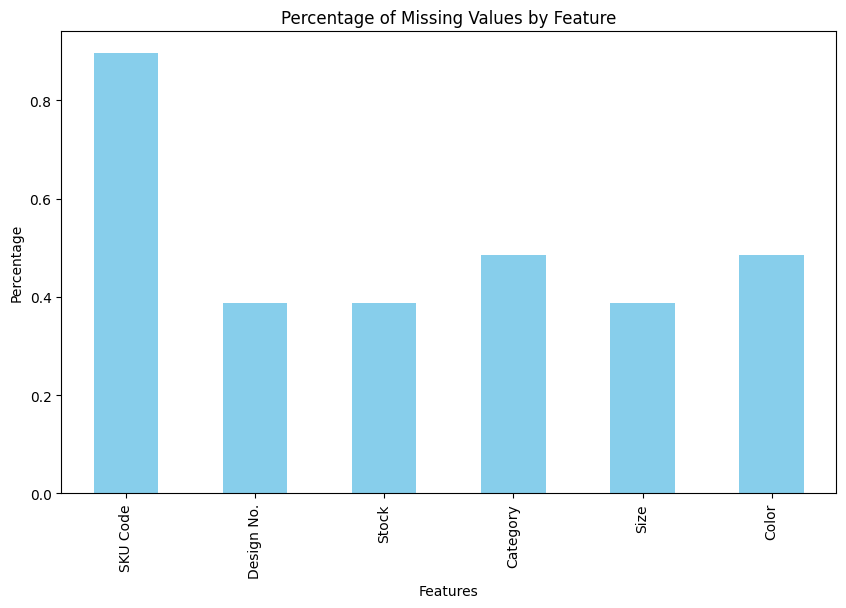

In [43]:
# Calculate percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Filter out columns with no missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Plot missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.show()

In [44]:
# Set your threshold (for example: 30%)
threshold = 30

# Remove features with missing values higher than the threshold
features_to_drop = missing_percentage[missing_percentage > threshold].index
data_cleaned = data.drop(columns=features_to_drop)

print(f"Removed features: {features_to_drop}")


Removed features: Index([], dtype='object')


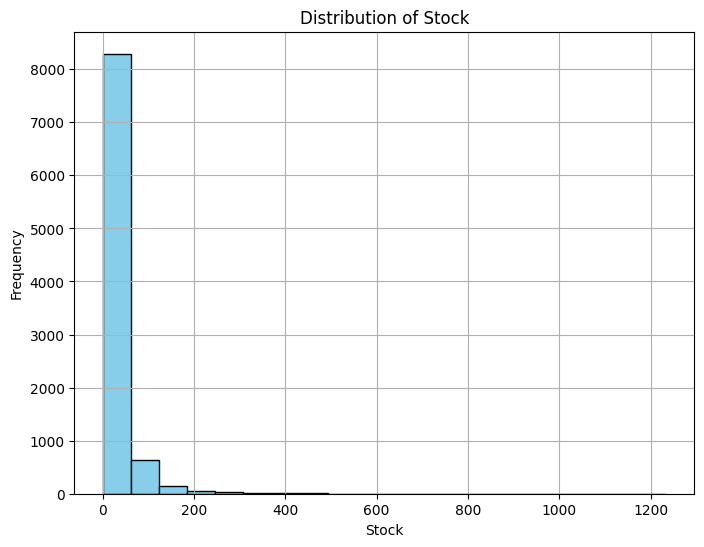

In [45]:

# Plot histogram for the 'Stock' column
plt.figure(figsize=(8, 6))
data['Stock'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Stock')
plt.xlabel('Stock')
plt.ylabel('Frequency')
plt.show()


- **Category Distribution**:


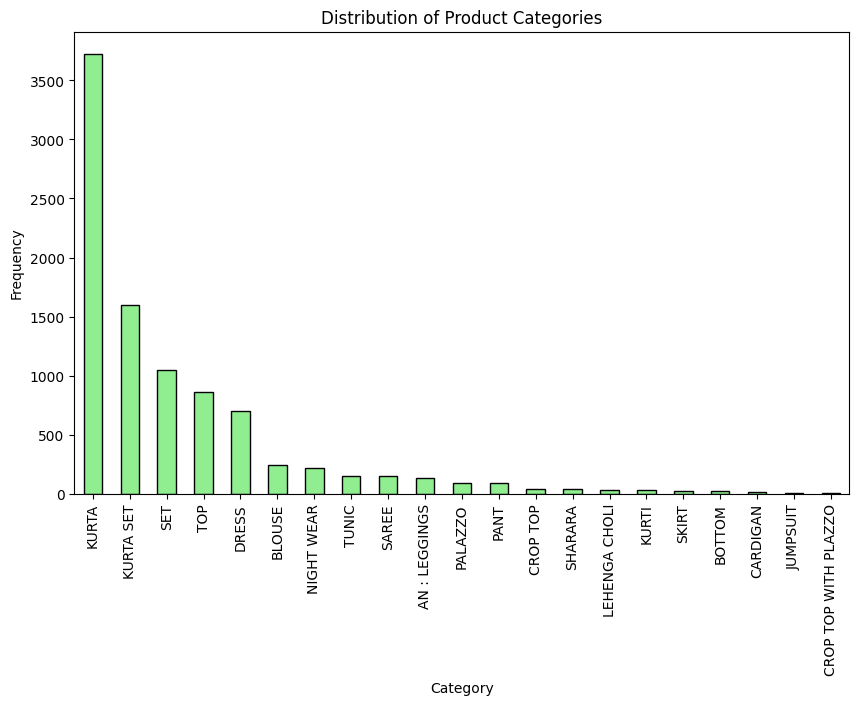

In [46]:
# Plot distribution for the 'Category' column
plt.figure(figsize=(10, 6))
data['Category'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


- **Color Distribution**:


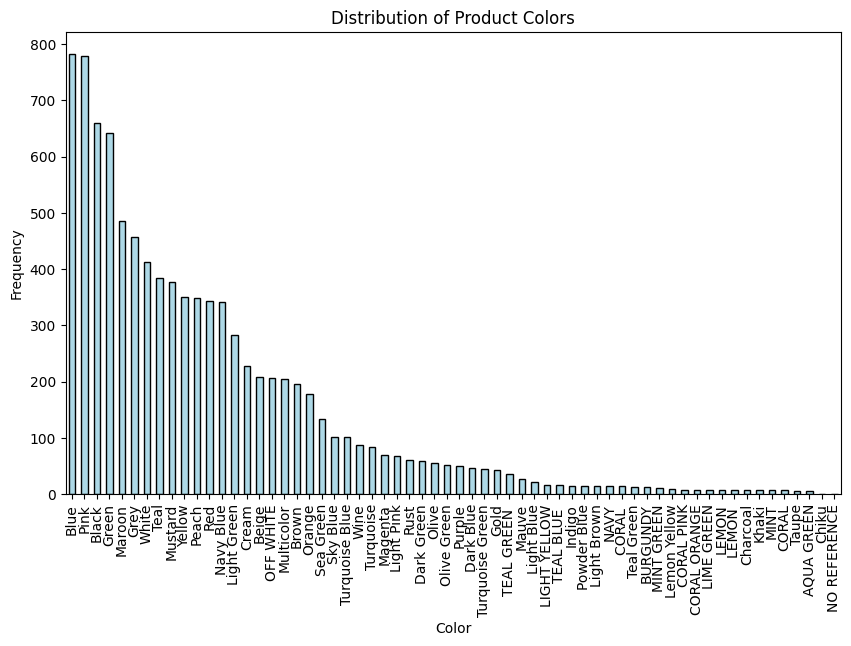

In [47]:
# Plot distribution for the 'Color' column
plt.figure(figsize=(10, 6))
data['Color'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of Product Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


- **Size Distribution**:


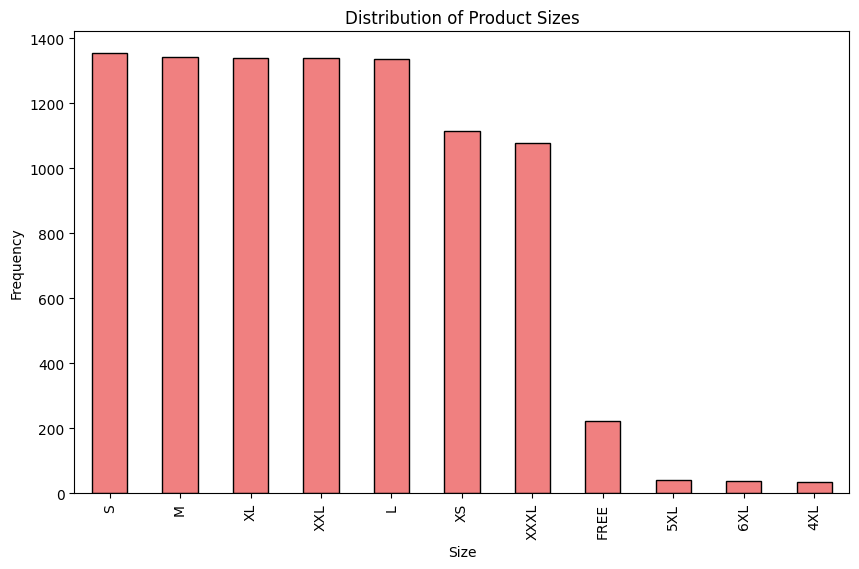

In [48]:
# Plot distribution for the 'Size' column
plt.figure(figsize=(10, 6))
data['Size'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribution of Product Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


### Handling Missing Values

Based on the visualizations of the distributions of each feature:

1. **Stock (Numerical Feature)**:
    - The distribution of the `Stock` feature shows that it is heavily skewed to the right, meaning that most products have low stock, with a few having very high stock.
    - **Imputation Strategy**: We will impute the missing values in `Stock` using the **median** value, as it is a more robust measure in the presence of skewed data and outliers.

2. **Category, Color, and Size (Categorical Features)**:
    - The categorical features `Category`, `Color`, and `Size` have missing values as well.
    - From the visualizations, we see that these features have specific dominant categories:
        - `KURTA`, `KURTA SET`, and `SET` are the most frequent product categories.
        - `Blue`, `Pink`, and `Black` are the most frequent colors.
        - `L`, `M`, and `S` are the most common sizes.
    - **Imputation Strategy**: To avoid distorting the categorical distributions, we will impute the missing values in `Category`, `Color`, and `Size` with `'Unknown'` rather than filling them with the mode.


In [49]:
# Impute numerical feature 'Stock' with median
data_cleaned['Stock'] = data_cleaned['Stock'].fillna(data_cleaned['Stock'].median())

# Impute categorical features with 'Unknown'
data_cleaned['Category'] = data_cleaned['Category'].fillna('Unknown')
data_cleaned['Color'] = data_cleaned['Color'].fillna('Unknown')
data_cleaned['Size'] = data_cleaned['Size'].fillna('Unknown')
# Impute missing 'Design No.' values with 'Unknown'
data_cleaned['Design No.'] = data_cleaned['Design No.'].fillna('Unknown')
# Drop the 'SKU Code' column
data_cleaned = data_cleaned.drop(columns=['SKU Code'])




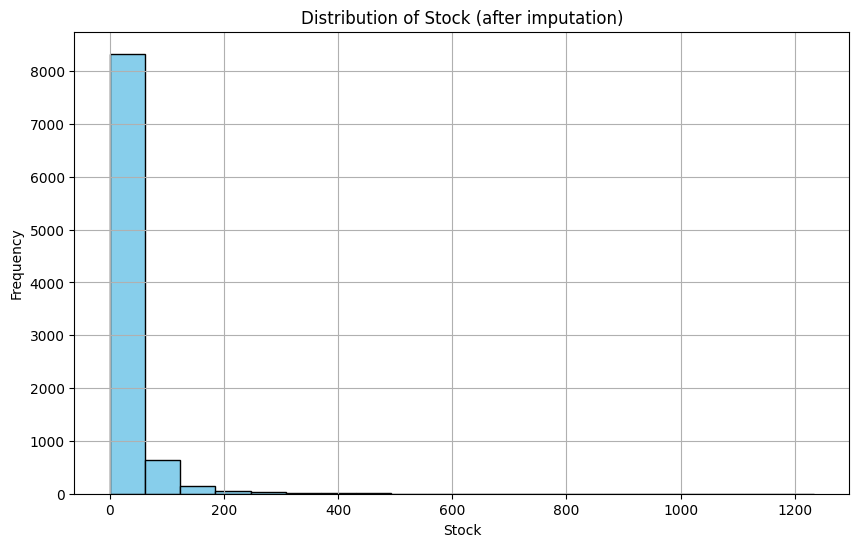

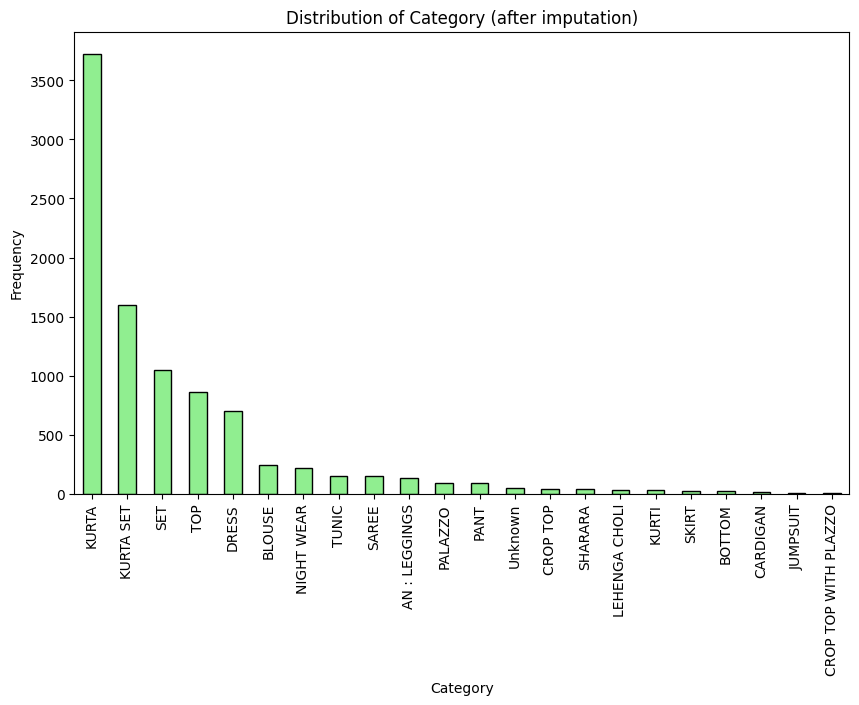

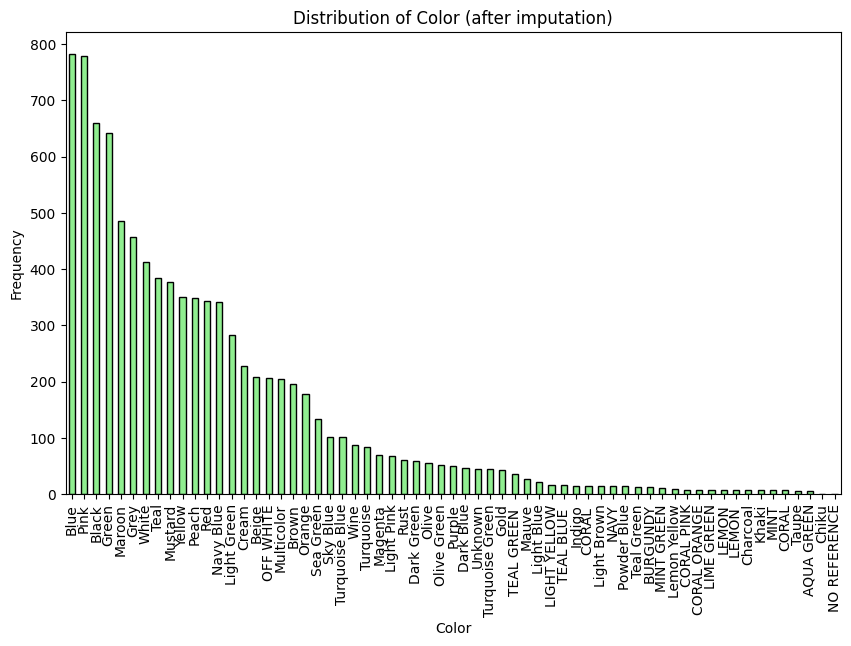

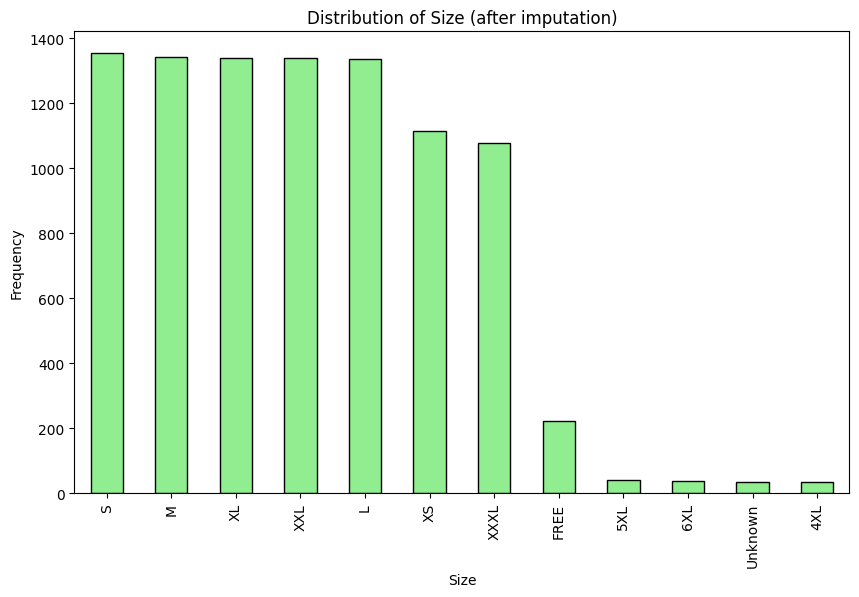

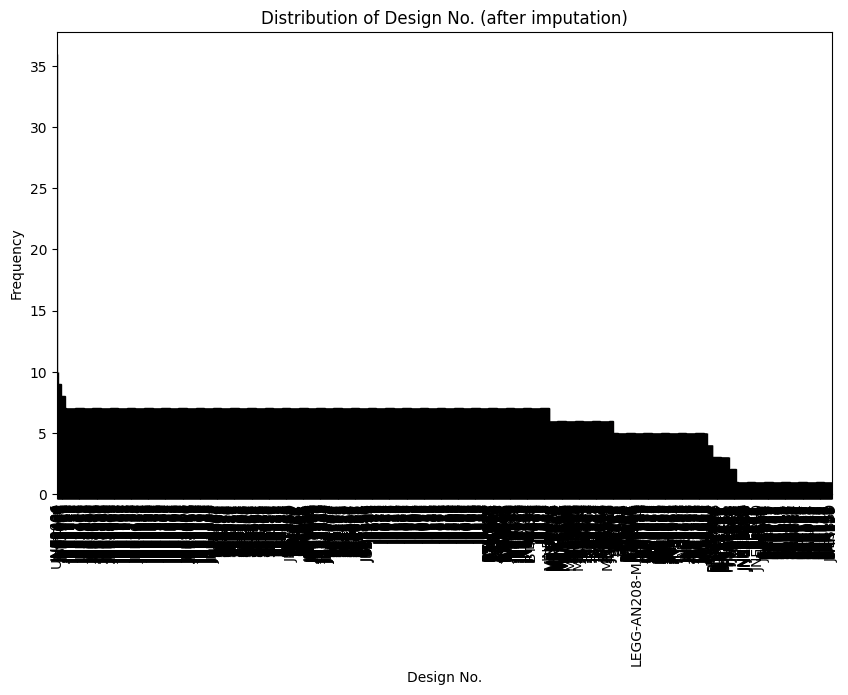

In [50]:

# List of columns to plot
columns_to_plot = ['Stock', 'Category', 'Color', 'Size', 'Design No.']

# Loop through each column and plot its distribution
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # For numerical column 'Stock', use a histogram
    if column == 'Stock':
        data_cleaned[column].hist(bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column} (after imputation)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    # For categorical columns, use a bar plot
    else:
        data_cleaned[column].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title(f'Distribution of {column} (after imputation)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
    
    # Show the plot
    plt.show()

1. **Stock Management: Products at Risk of Going Out of Stock**

   - **Goal**: Identify products with low stock levels and determine which categories need restocking.
   - **Analysis**: Filter products that have low stock and calculate the average stock per category.


           Category     Size    Color  Stock
0     AN : LEGGINGS        L      Red    5.0
1     AN : LEGGINGS        M      Red    5.0
2     AN : LEGGINGS        S      Red    3.0
3     AN : LEGGINGS       XL      Red    6.0
4     AN : LEGGINGS      XXL      Red    3.0
...             ...      ...      ...    ...
9266        Unknown  Unknown  Unknown    8.0
9267        Unknown  Unknown  Unknown    8.0
9268        Unknown  Unknown  Unknown    8.0
9269        Unknown  Unknown  Unknown    8.0
9270        Unknown  Unknown  Unknown    8.0

[6085 rows x 4 columns]


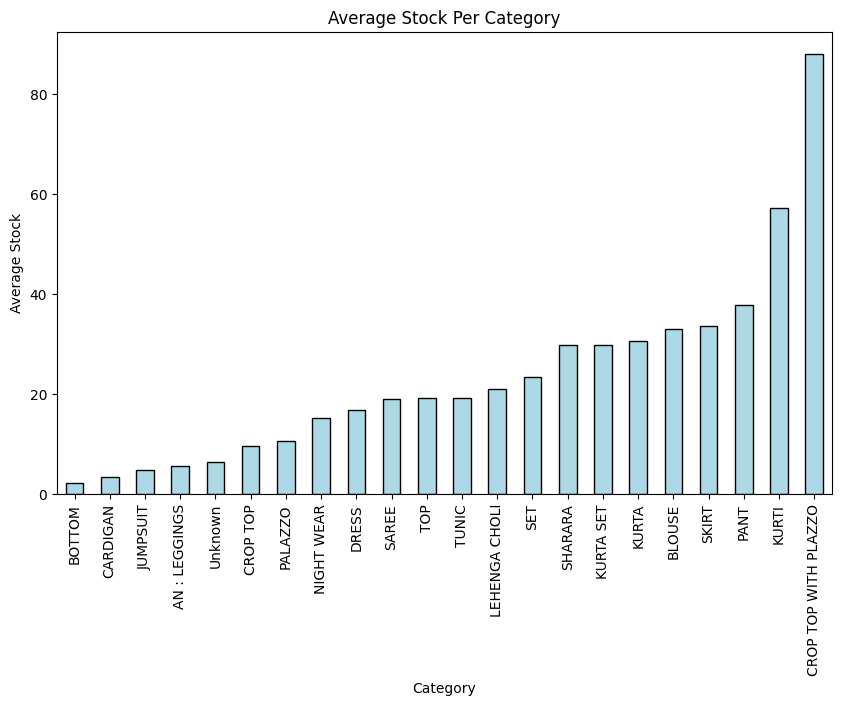

In [53]:
# Define a threshold for low stock (e.g., products with stock less than 20)
low_stock_threshold = 20

# Find products with stock levels below the threshold
low_stock_products = data_cleaned[data_cleaned['Stock'] < low_stock_threshold]

# Display the low stock products
print(low_stock_products[['Category', 'Size', 'Color', 'Stock']])

# Calculate average stock per category
avg_stock_per_category = data_cleaned.groupby('Category')['Stock'].mean().sort_values(ascending=True)

# Plot the average stock per category
plt.figure(figsize=(10, 6))
avg_stock_per_category.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Stock Per Category')
plt.xlabel('Category')
plt.ylabel('Average Stock')
plt.xticks(rotation=90)
plt.show()


- **Categories with High Stock**: `SKIRT`, `KURTI`, and `CROP TOP WITH PALAZZO` have the highest average stock. These categories may be overstocked and could benefit from promotional strategies to reduce excess inventory.

- **Categories with Low Stock**: Categories like `BOTTOM`, `CARDIGAN`, and `JUMPSUIT` have the lowest average stock. These categories might need restocking to avoid stockouts and meet customer demand.


2. **Category Insights: Popular Categories in Terms of Stock and Availability**

   - **Goal**: Identify which product categories are most stocked and available.
   - **Analysis**: Visualize the total stock per category to determine which categories are most popular.


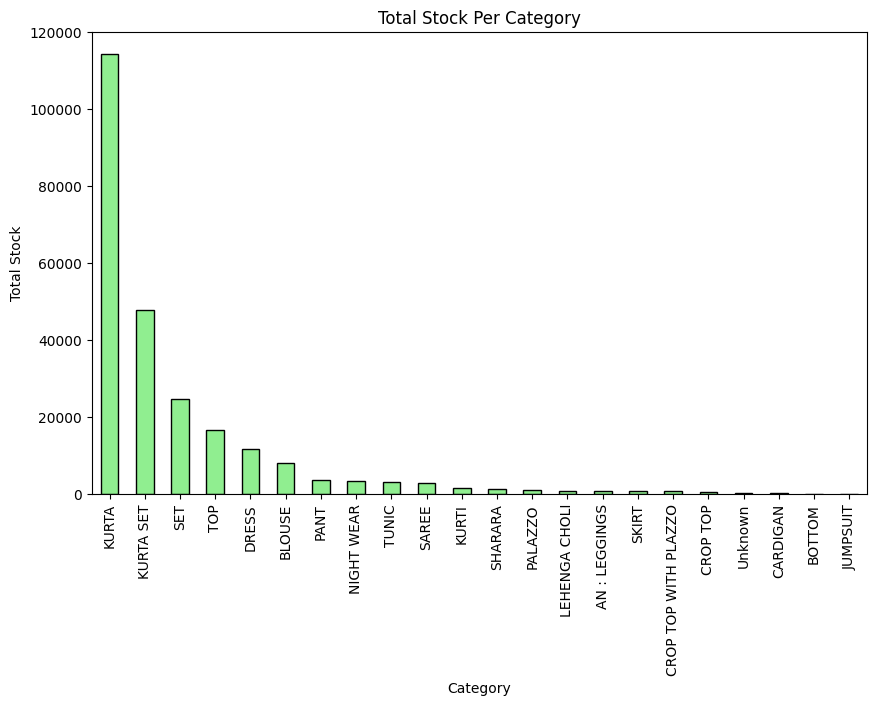

In [54]:
# Calculate total stock per category
total_stock_per_category = data_cleaned.groupby('Category')['Stock'].sum().sort_values(ascending=False)

# Plot the total stock per category
plt.figure(figsize=(10, 6))
total_stock_per_category.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Total Stock Per Category')
plt.xlabel('Category')
plt.ylabel('Total Stock')
plt.xticks(rotation=90)
plt.show()


### Insights from the Total Stock Per Category:

1. **Overstocked Categories**:
   - `KURTA` stands out with an exceptionally high stock level compared to other categories, followed by `KURTA SET` and `SET`. These categories might be overstocked, taking up valuable warehouse space, and might not be selling as fast.

2. **Understocked Categories**:
   - Many categories, such as `CARDIGAN`, `BOTTOM`, `JUMPSUIT`, and others, have relatively low stock levels compared to the leading categories. These could be at risk of stockouts if they are in demand.


3. **Size Availability: Are Certain Sizes Understocked or Oversupplied?**

   - **Goal**: Determine which sizes are over- or understocked.
   - **Analysis**: Compare the average stock for each size to identify imbalances.


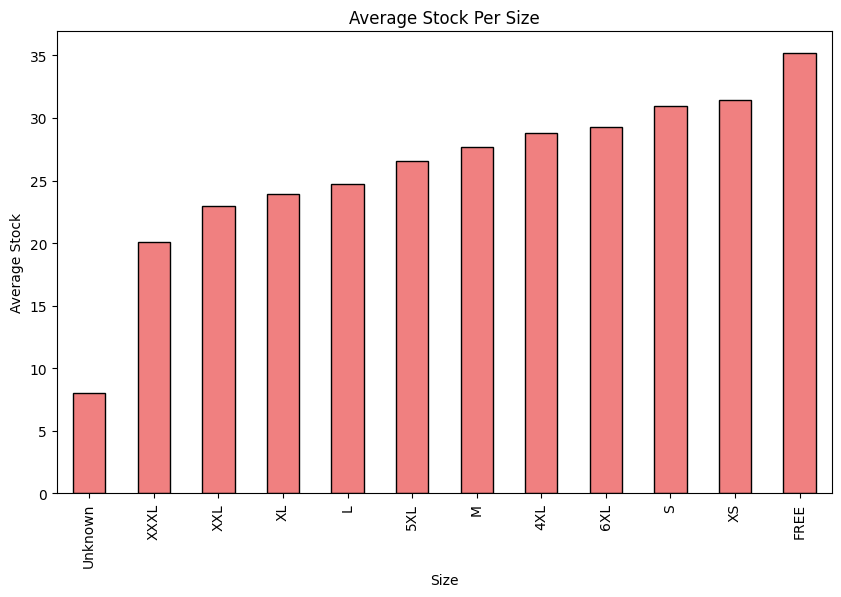

In [55]:
# Calculate average stock per size
avg_stock_per_size = data_cleaned.groupby('Size')['Stock'].mean().sort_values(ascending=True)

# Plot the average stock per size
plt.figure(figsize=(10, 6))
avg_stock_per_size.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Stock Per Size')
plt.xlabel('Size')
plt.ylabel('Average Stock')
plt.xticks(rotation=90)
plt.show()


### Insights from the Average Stock Per Size:

1. **High Average Stock for `FREE`, `XS`, and `S`**:
   - Sizes like `FREE`, `XS`, and `S` have higher average stock levels, which might indicate overstocking in smaller or universal size categories.

2. **Low Average Stock for `Unknown` and Larger Sizes**:
   - The `Unknown` size and sizes like `XXXL`, `XXL`, and `XL` have lower average stock levels, suggesting potential understocking for these sizes, which could lead to missed sales opportunities if they are in demand.


4. **Color Preferences: Most Common Colors in Stock**

   - **Goal**: Identify the most popular colors in terms of stock and availability.
   - **Analysis**: Visualize the stock distribution across different colors.


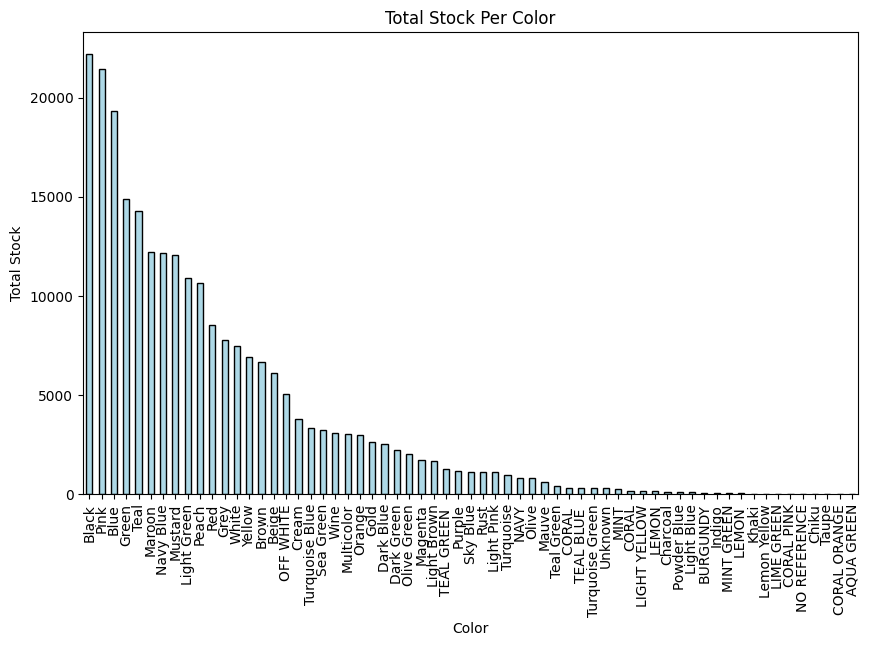

In [56]:
# Calculate total stock per color
total_stock_per_color = data_cleaned.groupby('Color')['Stock'].sum().sort_values(ascending=False)

# Plot the total stock per color
plt.figure(figsize=(10, 6))
total_stock_per_color.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Total Stock Per Color')
plt.xlabel('Color')
plt.ylabel('Total Stock')
plt.xticks(rotation=90)
plt.show()


1. **Overstocked Colors**:
   - Colors like **Black**, **Pink**, **Blue**, and **Green** are significantly overrepresented, with **Black** having the highest total stock. This suggests that these colors may be overstocked, potentially because of either high production or low demand.

2. **Understocked Colors**:
   - Several colors, such as **AQUA GREEN**, **CORAL ORANGE**, **LEMON**, and **MINT GREEN**, have very low total stock levels. If these colors are in demand, the business may risk stockouts, resulting in missed sales opportunities.


5. **Design Variability: Patterns in Design No. Correlating with Stock Levels**

   - **Goal**: Identify if certain `Design No.` values are associated with low or high stock levels.
   - **Analysis**: Visualize the stock levels by design number.


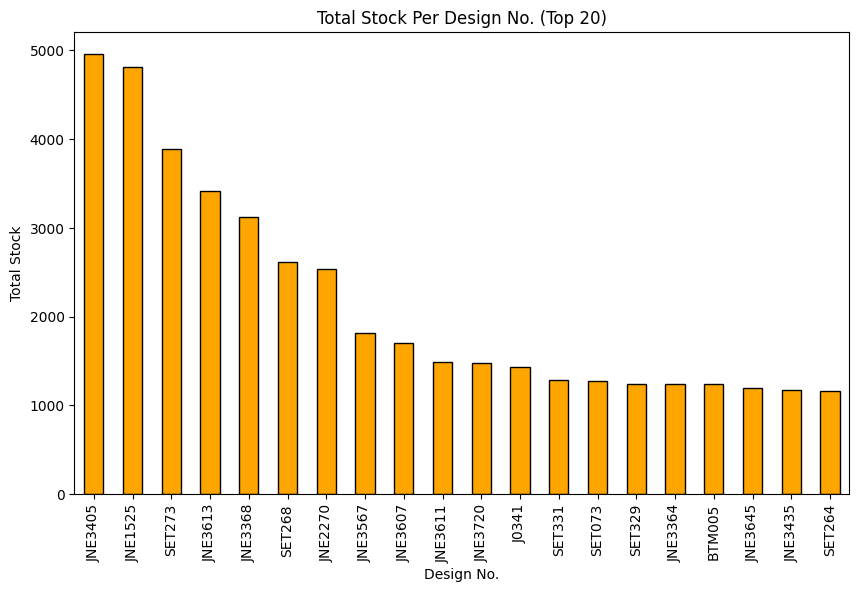

In [57]:
# Calculate total stock per design number
total_stock_per_design = data_cleaned.groupby('Design No.')['Stock'].sum().sort_values(ascending=False).head(20)

# Plot the total stock for the top 20 design numbers
plt.figure(figsize=(10, 6))
total_stock_per_design.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total Stock Per Design No. (Top 20)')
plt.xlabel('Design No.')
plt.ylabel('Total Stock')
plt.xticks(rotation=90)
plt.show()


### Insights from the Total Stock Per Design No.:

1. **Overstocked Designs**:
   - Designs like `JNE3405`, `JNE1525`, and `SET273` have the highest total stock levels, indicating that these designs may be overstocked.

2. **Understocked Designs**:
   - Designs further down the list, such as `JNE3435` and `SET264`, have significantly lower stock levels compared to the top designs, which could indicate understocking if there’s demand for these products.
